### ROC曲线

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

/Users/codingzhe/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/codingzhe/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/Users/codingzhe/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
%run ../pycharmproject/playML/metrics.py

In [7]:
fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores))
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

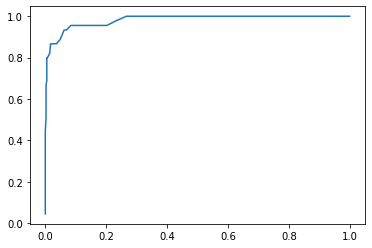

In [9]:
plt.plot(fprs, tprs)
plt.show()

### sklearn中的ROC

In [10]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

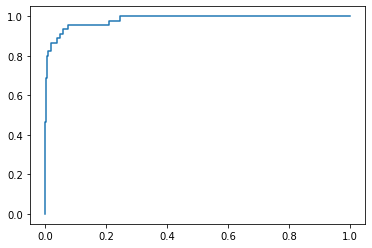

In [11]:
plt.plot(fprs, tprs)
plt.show()

In [12]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

0.9830452674897119

### 比较两个模型的优劣